In [80]:
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [105]:
file_path = os.path.join('cleaned_data', 'cleaned_autos.csv')

# Reading csv into raw dataframe
df = pd.read_csv(file_path, encoding="latin-1")

## Count of vehicles by type

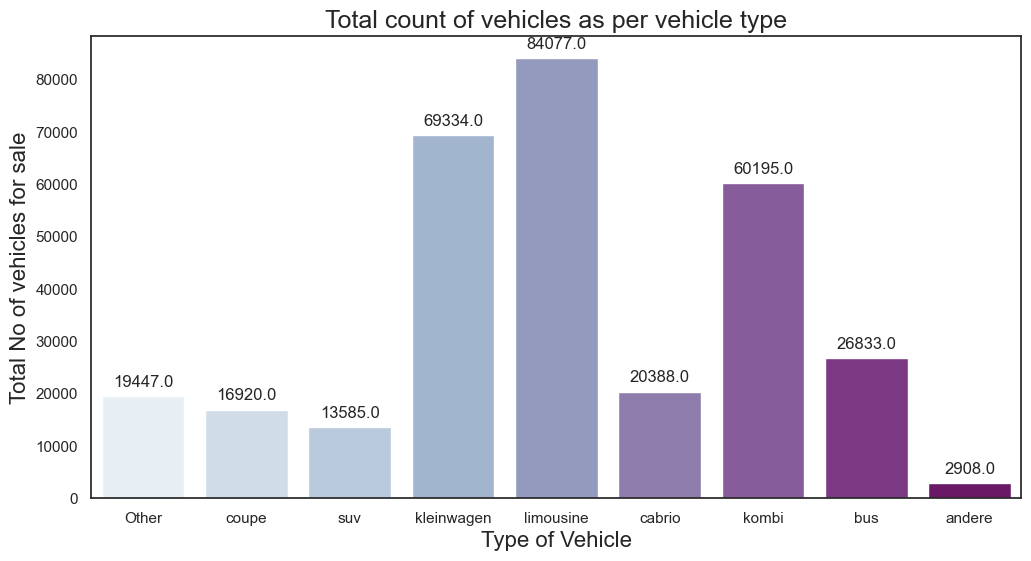

In [82]:

# Creating the count plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="vehicleType", hue="vehicleType", data=df, palette="BuPu", dodge=False, legend=False)

# Customizing labels
ax.set_xlabel("Type of Vehicle", fontsize=16)
ax.set_ylabel("Total No of vehicles for sale", fontsize=16)

# Title
ax.set_title("Total count of vehicles as per vehicle type", fontsize=18)

# Adding counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



## Count of Vehicles by Brand

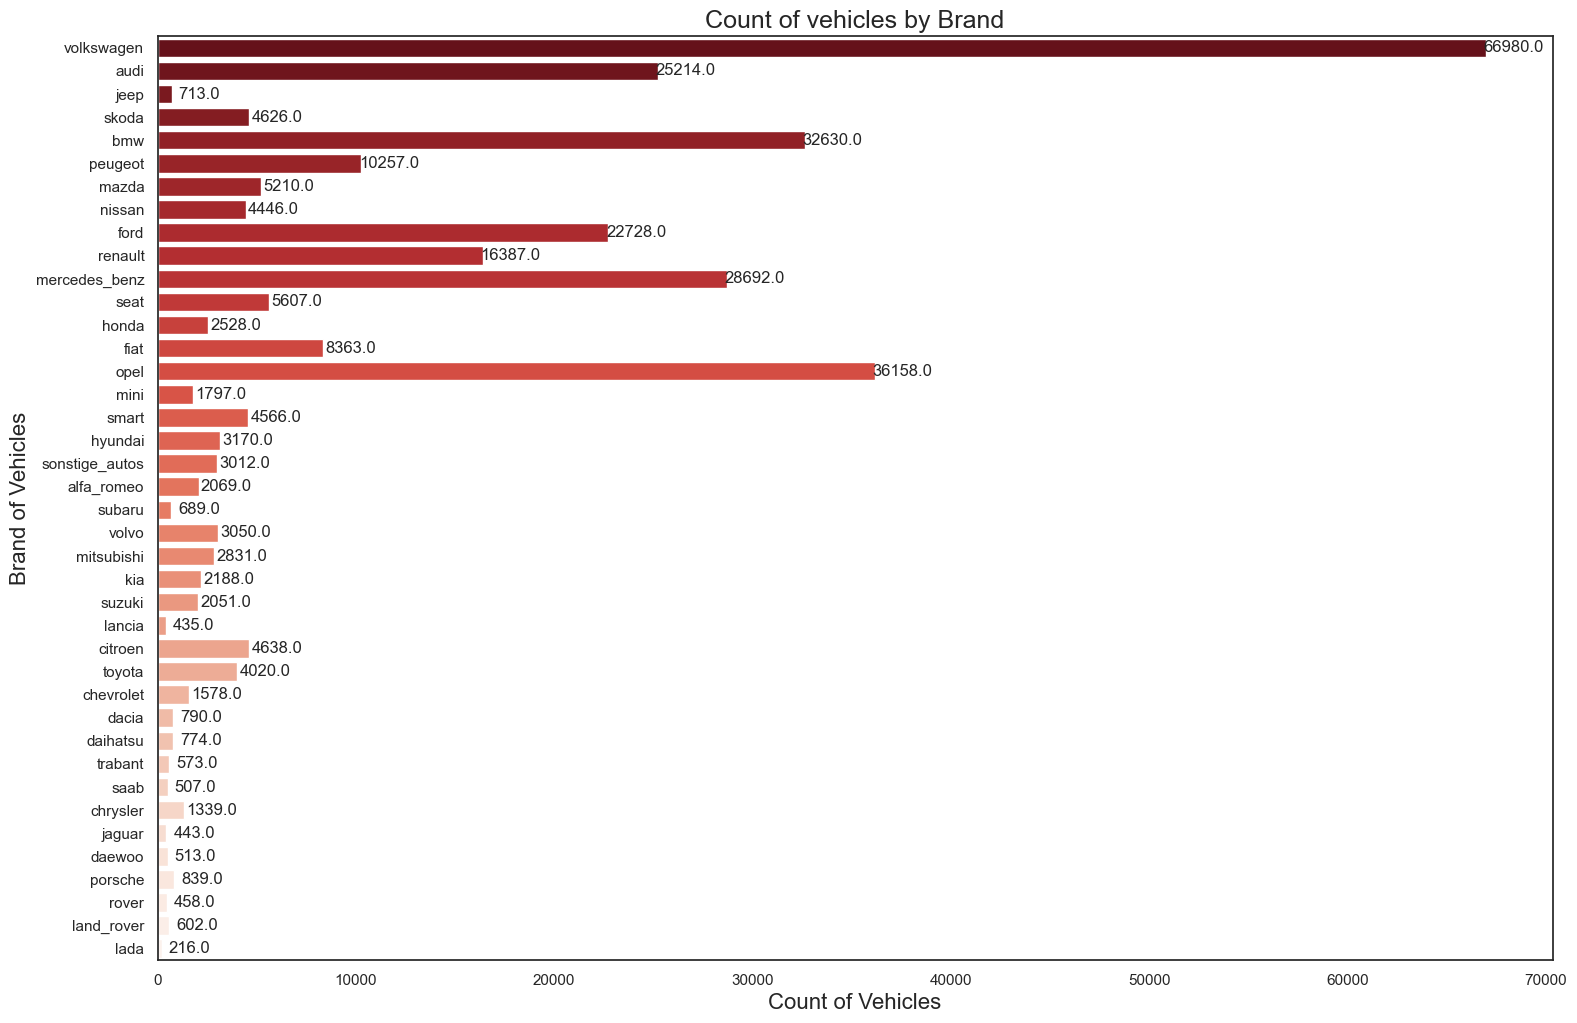

In [83]:
plt.figure(figsize=(18, 12))
ax = sns.countplot(y="brand", hue="brand", data=df, palette="Reds_r", dodge=False, legend=False)

ax.set_title("Count of vehicles by Brand", fontsize=18)
ax.set_xlabel("Count of Vehicles", fontsize=16)
ax.set_ylabel("Brand of Vehicles", fontsize=16)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', (width, p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(20, 0), textcoords='offset points')

plt.show()


## Numerical Features Heatmap

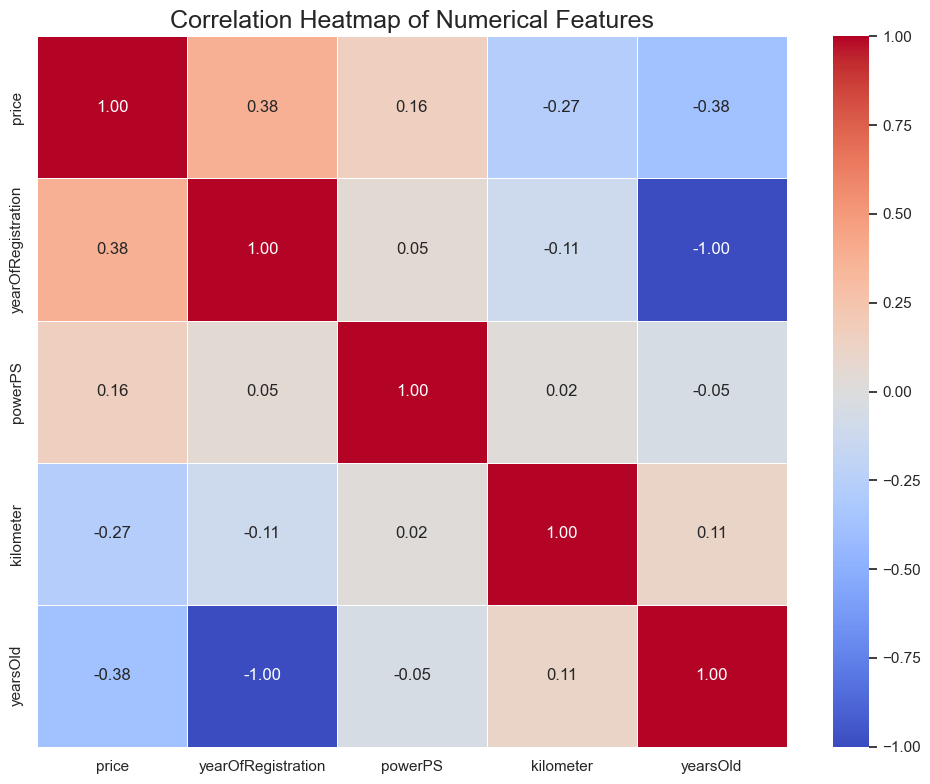

In [84]:

# Selecting numerical features for the correlation matrix
numerical_features = ['price', 'yearOfRegistration', 'powerPS', 'kilometer','yearsOld',]

# Calculating the correlation matrix
corr_matrix = df[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the title
ax.set_title("Correlation Heatmap of Numerical Features", fontsize=18)

plt.tight_layout()
plt.show()



## Average price of vehicles by Type and Brand

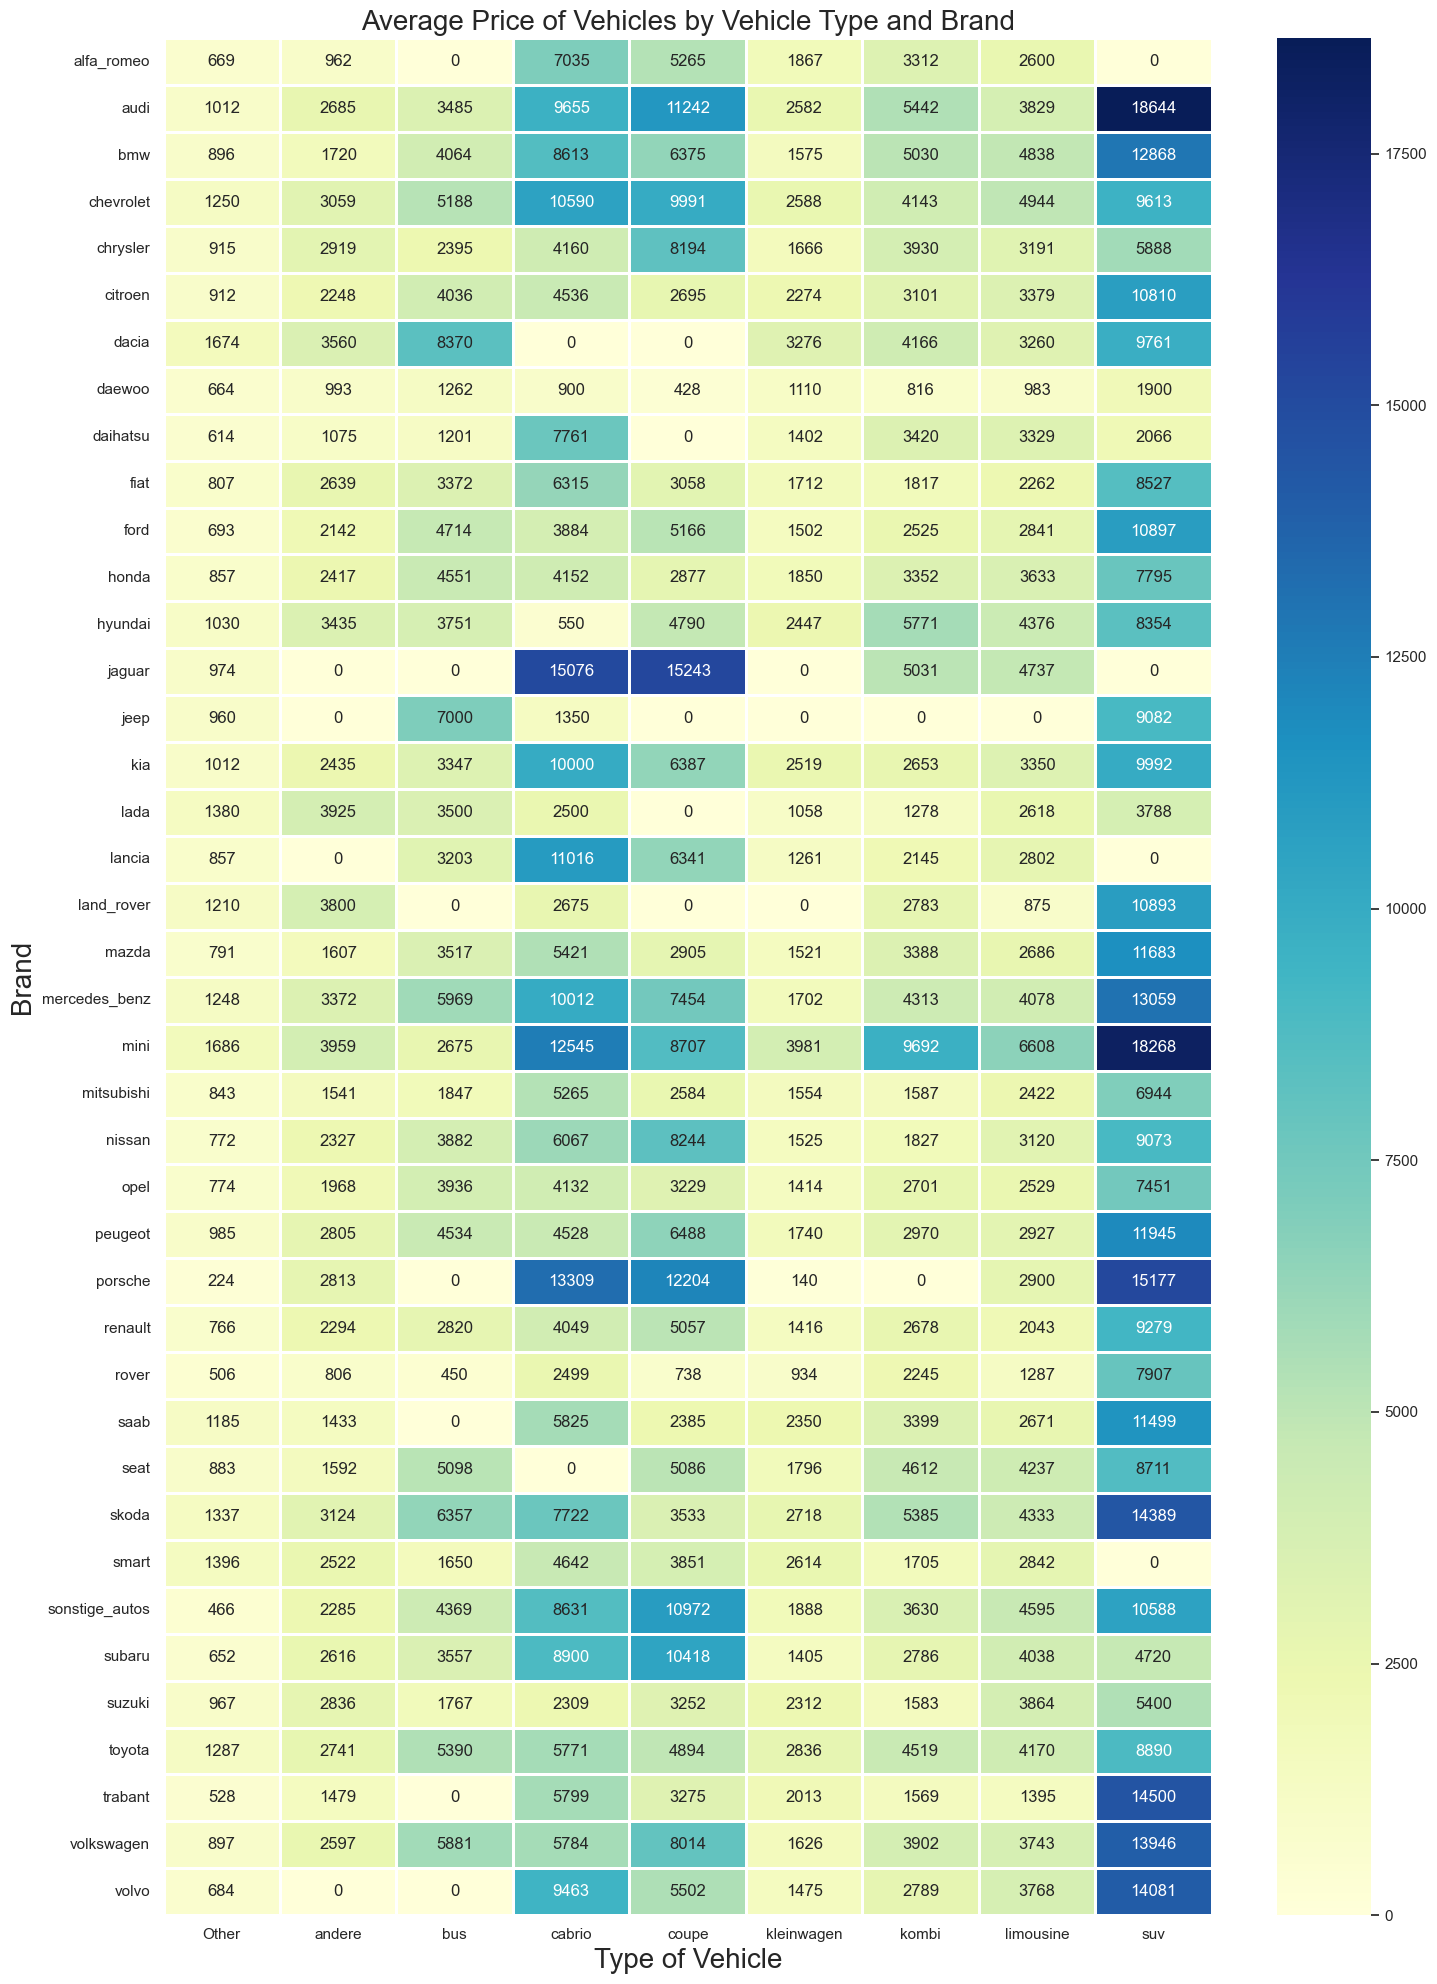

In [85]:

pivot_table = df.groupby(['brand', 'vehicleType'])['price'].mean().unstack().fillna(0).astype(int)

fig, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(pivot_table, linewidths=1, cmap="YlGnBu", annot=True, ax=ax, fmt="d")

ax.set_title("Average Price of Vehicles by Vehicle Type and Brand", fontdict={'size': 20})
ax.set_xlabel("Type of Vehicle", fontdict={'size': 20})
ax.set_ylabel("Brand", fontdict={'size': 20})

plt.tight_layout()
plt.show()



## OLS: Oridinary Least Square

In [104]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



df = df.dropna(subset=required_columns)

label_encoder = LabelEncoder()
df['gearbox'] = label_encoder.fit_transform(df['gearbox'])

df = pd.get_dummies(df, columns=['brand'], drop_first=True)

# Converting boolean columns to integers
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)
df = df.apply(pd.to_numeric, errors='coerce')

features = ['yearOfRegistration', 'powerPS', 'kilometer', 'gearbox'] #+ [col for col in df.columns if col.startswith('brand_')]
target = 'price'
X = df[features]
y = df[target]

X = X.dropna()
y = y.loc[X.index]
X = sm.add_constant(X)
X = np.asarray(X)
y = np.asarray(y)

# print("X Data Types:", X.dtype)
# print("y Data Types:", y.dtype)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ols_model = sm.OLS(y_train, X_train).fit()
print(ols_model.summary())
y_pred = ols_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                 1.818e+04
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:26:33   Log-Likelihood:            -2.4156e+06
No. Observations:              250949   AIC:                         4.831e+06
Df Residuals:                  250944   BIC:                         4.831e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.144e+05   2180.189   -190.067      0.0